In [12]:
import pandas as pd
import numpy as np
from scipy import stats
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb

np.set_printoptions(linewidth=np.inf, suppress=True, precision=2)

In [13]:
import mitosheet

In [14]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

pyo.init_notebook_mode(connected=True)

In [15]:
with open('Data/Data12/DT_result_12I1O.pkl', 'rb') as f:
    result = pickle.load(f)

In [16]:
result

[(0,
  'decisiontreeregressor',
  ['Input 08',
   'Input 01',
   'Input 09',
   'Input 03',
   'Input 07',
   'Input 06',
   'Input 04',
   'Input 11',
   'Input 02',
   'Input 05',
   'Input 10',
   'Input 12'],
  {'r2': 0.7396661719274343,
   'neg_root_mean_squared_error': -0.06419162390336428,
   'total_zeros': 7203}),
 (1,
  'decisiontreeregressor',
  ['Input 08',
   'Input 01',
   'Input 06',
   'Input 03',
   'Input 12',
   'Input 10',
   'Input 11',
   'Input 07',
   'Input 02',
   'Input 04',
   'Input 05',
   'Input 09'],
  {'r2': 0.803206817996785,
   'neg_root_mean_squared_error': -0.04942233539912765,
   'total_zeros': 4154}),
 (2,
  'decisiontreeregressor',
  ['Input 08',
   'Input 01',
   'Input 06',
   'Input 12',
   'Input 05',
   'Input 09',
   'Input 03',
   'Input 11',
   'Input 02',
   'Input 10',
   'Input 04',
   'Input 07'],
  {'r2': 0.7842951766100591,
   'neg_root_mean_squared_error': -0.05167930620115213,
   'total_zeros': 4031}),
 (3,
  'decisiontreeregressor

In [17]:
df_r = pd.DataFrame(result)
df_r

,0,1,2,3
0,0,decisiontreeregressor,"[Input 08, Input 01, Input 09, Input 03, Input 07, Input 06, Input 04, Input 11, Input 02, Input 05, Input 10, Input 12]","{'r2': 0.7396661719274343, 'neg_root_mean_squared_error': -0.06419162390336428, 'total_zeros': 7203}"
1,1,decisiontreeregressor,"[Input 08, Input 01, Input 06, Input 03, Input 12, Input 10, Input 11, Input 07, Input 02, Input 04, Input 05, Input 09]","{'r2': 0.803206817996785, 'neg_root_mean_squared_error': -0.04942233539912765, 'total_zeros': 4154}"
2,2,decisiontreeregressor,"[Input 08, Input 01, Input 06, Input 12, Input 05, Input 09, Input 03, Input 11, Input 02, Input 10, Input 04, Input 07]","{'r2': 0.7842951766100591, 'neg_root_mean_squared_error': -0.05167930620115213, 'total_zeros': 4031}"
3,3,decisiontreeregressor,"[Input 08, Input 01, Input 06, Input 03, Input 09, Input 02, Input 11, Input 05, Input 04, Input 12, Input 07, Input 10]","{'r2': 0.8020263887556816, 'neg_root_mean_squared_error': -0.05051038807390423, 'total_zeros': 4054}"
4,4,decisiontreeregressor,"[Input 08, Input 01, Input 06, Input 12, Input 05, Input 02, Input 04, Input 03, Input 09, Input 07, Input 11, Input 10]","{'r2': 0.7608780651637808, 'neg_root_mean_squared_error': -0.05427260784312088, 'total_zeros': 2472}"
...,...,...,...,...
6,6,decisiontreeregressor,"[Input 08, Input 03, Input 06, Input 01, Input 05, Input 02, Input 07, Input 04, Input 09, Input 10, Input 11, Input 12]","{'r2': 0.7626868548968547, 'neg_root_mean_squared_error': -0.052894307131830895, 'total_zeros': 5330}"
7,7,decisiontreeregressor,"[Input 06, Input 08, Input 03, Input 01, Input 12, Input 09, Input 05, Input 04, Input 07, Input 10, Input 11, Input 02]","{'r2': 0.7835688982598744, 'neg_root_mean_squared_error': -0.052574850424497874, 'total_zeros': 3579}"
8,8,decisiontreeregressor,"[Input 06, Input 01, Input 10, Input 04, Input 03, Input 08, Input 05, Input 09, Input 02, Input 07, Input 11, Input 12]","{'r2': 0.853578058505167, 'neg_root_mean_squared_error': -0.04134484326894286, 'total_zeros': 3544}"
9,9,decisiontreeregressor,"[Input 06, Input 01, Input 10, Input 04, Input 05, Input 07, Input 03, Input 08, Input 11, Input 12, Input 02, Input 09]","{'r2': 0.8470203266654666, 'neg_root_mean_squared_error': -0.04483188087422816, 'total_zeros': 6516}"


In [18]:
r2 = df_r[3].apply(pd.Series)
r2

,r2,neg_root_mean_squared_error,total_zeros
0,0.739666,-0.064192,7203.0
1,0.803207,-0.049422,4154.0
2,0.784295,-0.051679,4031.0
3,0.802026,-0.050510,4054.0
4,0.760878,-0.054273,2472.0
...,...,...,...
6,0.762687,-0.052894,5330.0
7,0.783569,-0.052575,3579.0
8,0.853578,-0.041345,3544.0
9,0.847020,-0.044832,6516.0


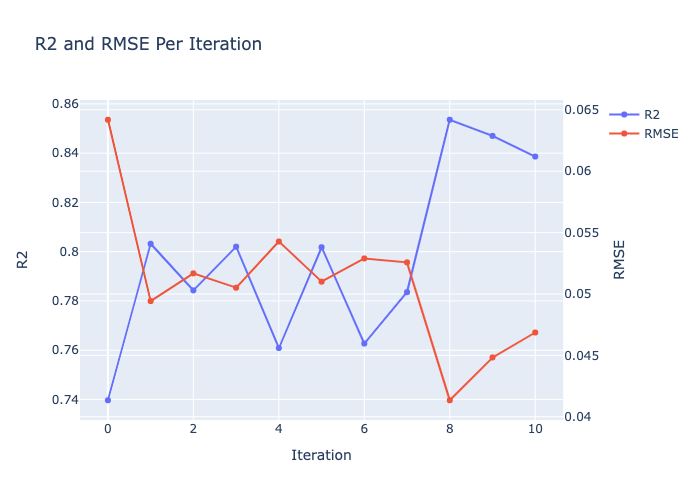

In [19]:
fig = make_subplots(specs=[[{"secondary_y": True}]])


fig.add_trace(go.Scatter(y =  r2.r2, x = r2.index, name = "R2"),  secondary_y=False)
fig.add_trace(go.Scatter(y =  r2.neg_root_mean_squared_error * -1, x = r2.index, name = "RMSE"), secondary_y=True)


fig.update_layout(title="R2 and RMSE Per Iteration",
                    xaxis_title='Iteration',
                    yaxis_title='R2',
                    yaxis2_title='RMSE',
                   autosize=False,
                   width=900,
                  height=500,
                 )
fig.update_layout(title_text = "R2 and RMSE Per Iteration")

fig.show()

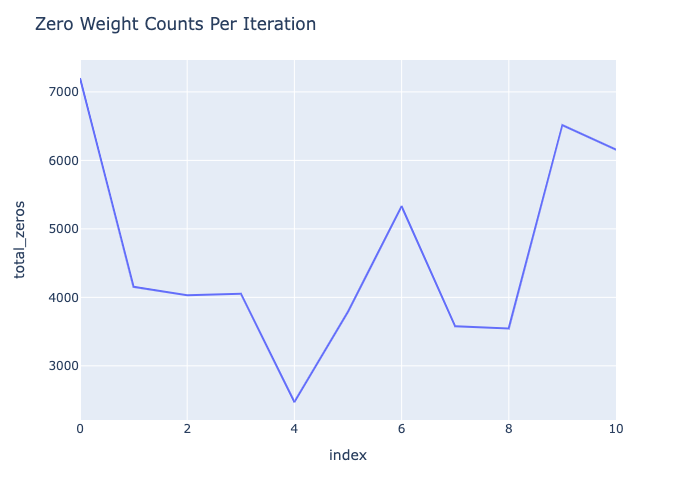

In [20]:
fig = px.line(r2, x=r2.index, y=r2.total_zeros)

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Zero Weight Counts Per Iteration",
)

fig.show()

In [21]:
df_imp = pd.read_pickle('Data/Data12/DT_12I1O_df_imp.pkl')
df_imp

,Feature Name,Importance,index,Zero_Count,Iteration
0,Output 01,0.807431,Output 01,0,0
1,Input 08,0.036786,Input 08,428,0
2,Input 01,0.030032,Input 01,330,0
3,Input 09,0.028091,Input 09,599,0
4,Input 03,0.025816,Input 03,249,0
...,...,...,...,...,...
138,Input 08,0.001412,Input 08,632,10
139,Input 09,0.001270,Input 09,975,10
140,Input 12,0.000678,Input 12,911,10
141,Input 02,0.000429,Input 02,966,10


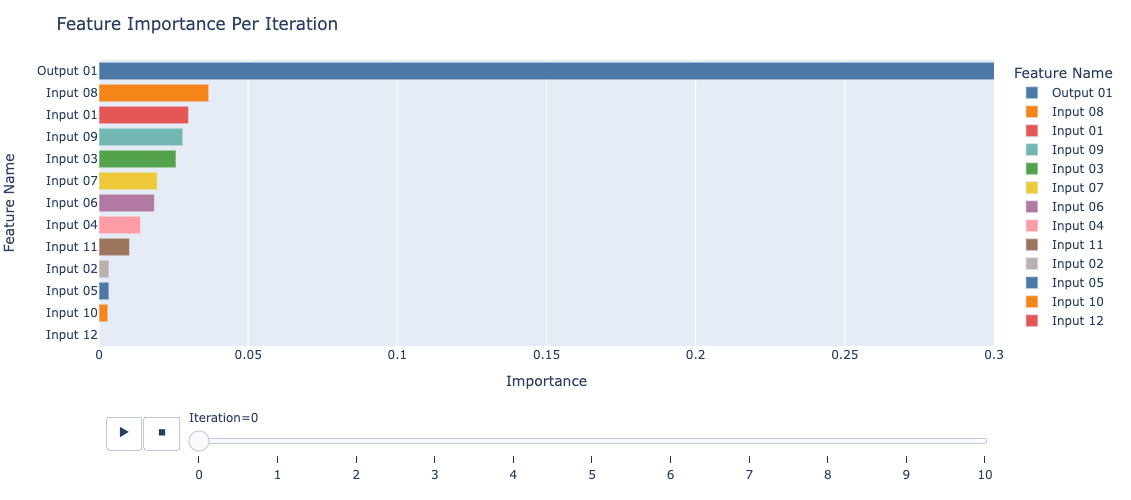

In [57]:
fig = px.bar(
    df_imp,
    y="Feature Name",
    x="Importance",
    color="Feature Name",
    color_discrete_sequence=px.colors.qualitative.T10,
    animation_frame="Iteration",
    animation_group="Feature Name",
    orientation="h",
    range_x=[0,0.3]
)

fig.update_yaxes(categoryorder='total ascending')

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text=f"Feature Importance Per Iteration",
    #paper_bgcolor='#2d3035',
    #plot_bgcolor='#2d3035', 
)


fig.show()

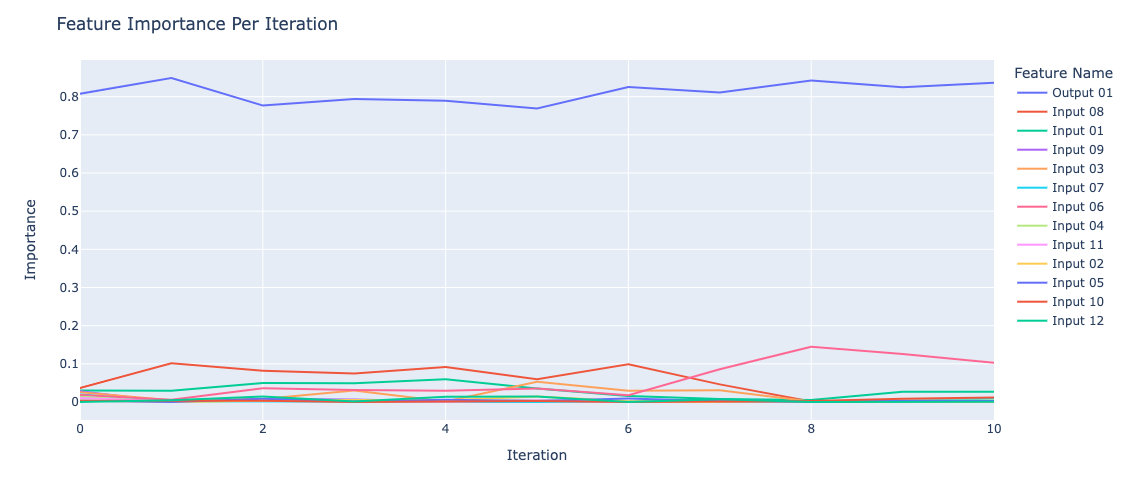

In [63]:
fig = px.line(df_imp, x='Iteration', y="Importance", color = "Feature Name")

fig.update_layout(
    autosize=False,
    width=1000,
    height=500,
    title_text=f"Feature Importance Per Iteration",
    #paper_bgcolor='#2d3035',
    #plot_bgcolor='#2d3035', 
)

fig.show()